# Analyzing Manhattan Property Sales 


---


Team 5: Carmen Cheung, Haiyuan Zhang, Peixuan Liu, Jiazhi Jia, Yu Shu






## Background
Manhattan, NY is a very attractive city to live in due to career opportunities, culture, entertainment, and more. It is also one of the most expensive cities in the U.S. to buy property. According to Rocket Mortgage, Manhattan ranks second behind San Francisco, CA and has the highest average price per square foot of real estate in the United States in 2021 at 1,400 dollars per square foot while the national average is 144 dollars per square foot. In such a pricey real estate market, it is crucial for prospective buyers and sellers to understand the housing market and trends in Manhattan to make informed decisions. 

## Objective
Our goal is to identify trends of Manhattan real estate using property sales data from 2017 - 2021. We will analyze relationships between variables over the years to identify what type of properties are most demanded in Manhattan and understand housing market trends. We can also build a machine learning model to predict sales value in the future. The analysis and insight gained from this project can identify major trends to help buyers and sellers navigate a volatile market.


## Dataset Information


---




### Data Profile 
Categorical Variables:
*   Borough
*   Neighborhood
*   Building Class Category 
*   Tax Class at Present 
*   Building class at Present 
*   Block 
*   Lot 
*   Address
*   Zip Code 
*   Apartment Number 

Numeric Variables:
*   Residential Unit 
*   Commercial Unit 
*   Total Unit 
*   Land Square Feet 
*   Gross Square Feet
*   Sale Price 
*   Year Built

Date Variables:
*   Sale Date 



### Data Source
NYC Department of Finance 
https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page 

### Data Cleaning
The following steps were taken to clean the datasets:

1.   Combined yearly sales data from 2017 to 2020 and rolling sales data from 2020-2021 and renamed columns to concatanate data on column name.
2.   Created a unique identifier for each property using Borough, Block, Lot called “BBL”.
3.   Dropped columns because of missing values or redundant and duplicate date.
4.   Converted data to appropriate data type. 















In [149]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
# Import data to Collab
house_2017 = pd.read_excel('/content/drive/MyDrive/Team Project/2017_manhattan.xlsx')
house_2018 = pd.read_excel('/content/drive/MyDrive/Team Project/2018_manhattan.xlsx')
house_2019 = pd.read_excel('/content/drive/MyDrive/Team Project/2019_manhattan.xlsx')
house_2020 = pd.read_excel('/content/drive/MyDrive/Team Project/2020_manhattan.xlsx')
house_2021 = pd.read_excel('/content/drive/MyDrive/Team Project/rollingsales_manhattan2021.xlsx')

In [151]:
# Set column names to standardize name for combining datasets
house_2017.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2018.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2019.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2020.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]
house_2021.columns=["BOROUGH","NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS", "BLOCK", "LOT", "EASEMENT", "BUILDING CLASS", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"]

In [152]:
# Join 2017-2021 sales data tables
house = pd.concat([house_2017, house_2018, house_2019, house_2020, house_2021], ignore_index=True, keys=['2017', '2018', '2019', '2020', '2021'])

In [153]:
# Create a "BBL" column as a unique property ID using "Borough", "Block", "Lot"
house['BBL'] = house['BOROUGH'].astype(str) + house['BLOCK'].astype(str) + house['LOT'].astype(str)
house["BBL"] = house["BBL"].str.replace(".", "")

In [154]:
house.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS,BLOCK,LOT,EASEMENT,BUILDING CLASS,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BBL
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,10009,11.0,0.0,11.0,1750.0,6500.0,1900.0,2,C4,3750000,2017-04-03,137528
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,10009,24.0,1.0,25.0,2650.0,9960.0,1910.0,2,C7,5235000,2017-07-11,138536
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,10009,5.0,0.0,5.0,2139.0,4416.0,1900.0,2,C2,0,2017-06-16,13925
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5.0,0.0,5.0,1633.0,6440.0,1900.0,2,C2,6625000,2017-07-19,13926
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,,10009,11.0,1.0,12.0,2388.0,8045.0,1900.0,2,C7,7675000,2017-11-13,140061


In [155]:
house.shape

(84434, 22)

In [156]:
# Check all missing values
house.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS                           199
BLOCK                                 0
LOT                                   0
EASEMENT                          65792
BUILDING CLASS                      199
ADDRESS                               0
APARTMENT NUMBER                  35057
ZIP CODE                              0
RESIDENTIAL UNITS                 21939
COMMERCIAL UNITS                  29582
TOTAL UNITS                       21403
LAND SQUARE FEET                  30118
GROSS SQUARE FEET                 30118
YEAR BUILT                         5511
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
BBL                                   0
dtype: int64

In [157]:
# Drop the 'EASEMENT' and "APARTMENT NUMBER" column because many missing values
# Drop the "TAX CLASS" and "BUILDING CLASS" column because redundant 
# Drop the duplicated values (overlap in data between 2020 sales dataset and rolling sales 2020-2021 dataset)
house.drop(axis=1,columns=['EASEMENT', 'APARTMENT NUMBER', 'TAX CLASS', 'BUILDING CLASS'], inplace=True)
house.drop_duplicates(inplace=True, ignore_index=True)

In [158]:
#Renamed "TAX CLASS AT TIME OF SALE" and "BUILDING CLASS AT TIME OF SALE" to shorten 
house.rename(columns={'TAX CLASS AT TIME OF SALE': 'TAX CLASS', 'BUILDING CLASS AT TIME OF SALE': 'BUILDING CLASS'}, inplace=True)

In [159]:
# Convert float to integer
house['RESIDENTIAL UNITS']=house['RESIDENTIAL UNITS'].fillna(-1)
house['COMMERCIAL UNITS']=house['COMMERCIAL UNITS'].fillna(-1)
house['TOTAL UNITS']=house['TOTAL UNITS'].fillna(-1)
house['LAND SQUARE FEET']=house['LAND SQUARE FEET'].fillna(-1)
house['GROSS SQUARE FEET']=house['GROSS SQUARE FEET'].fillna(-1)
house['YEAR BUILT']=house['YEAR BUILT'].fillna(-1)
house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']]=house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']].astype('Int64')
house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']]=house[['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']].replace(-1, np.nan)

In [160]:
house.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81779 entries, 0 to 81778
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  81779 non-null  int64         
 1   NEIGHBORHOOD             81779 non-null  object        
 2   BUILDING CLASS CATEGORY  81779 non-null  object        
 3   BLOCK                    81779 non-null  int64         
 4   LOT                      81779 non-null  int64         
 5   ADDRESS                  81779 non-null  object        
 6   ZIP CODE                 81779 non-null  int64         
 7   RESIDENTIAL UNITS        61702 non-null  Int64         
 8   COMMERCIAL UNITS         54059 non-null  Int64         
 9   TOTAL UNITS              62238 non-null  Int64         
 10  LAND SQUARE FEET         53523 non-null  Int64         
 11  GROSS SQUARE FEET        53523 non-null  Int64         
 12  YEAR BUILT               76308 n

In [161]:
# Fill missing values
house['RESIDENTIAL UNITS'].fillna((house['RESIDENTIAL UNITS'].median().astype(int)), inplace=True)
house['COMMERCIAL UNITS'].fillna((house['COMMERCIAL UNITS'].median().astype(int)), inplace=True)
house['TOTAL UNITS'].fillna((house['TOTAL UNITS'].median().astype(int)), inplace=True)
house['LAND SQUARE FEET'].fillna((house['LAND SQUARE FEET'].loc[house['LAND SQUARE FEET'] != 0]).median(), inplace=True)
house['LAND SQUARE FEET'].replace(0,(house['LAND SQUARE FEET'].loc[house['LAND SQUARE FEET'] != 0]).median(),inplace=True)
house['GROSS SQUARE FEET'].fillna((house['GROSS SQUARE FEET'].loc[house['GROSS SQUARE FEET'] != 0]).median(), inplace=True)
house['GROSS SQUARE FEET'].replace(0,(house['GROSS SQUARE FEET'].loc[house['GROSS SQUARE FEET'] != 0]).median(),inplace=True)
house['YEAR BUILT'].fillna(0, inplace=True)

In [162]:
house.to_csv(r"\content\drive\house_clean.csv")

In [163]:
house.isnull().sum()

BOROUGH                    0
NEIGHBORHOOD               0
BUILDING CLASS CATEGORY    0
BLOCK                      0
LOT                        0
ADDRESS                    0
ZIP CODE                   0
RESIDENTIAL UNITS          0
COMMERCIAL UNITS           0
TOTAL UNITS                0
LAND SQUARE FEET           0
GROSS SQUARE FEET          0
YEAR BUILT                 0
TAX CLASS                  0
BUILDING CLASS             0
SALE PRICE                 0
SALE DATE                  0
BBL                        0
dtype: int64

In [164]:
house.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS,BUILDING CLASS,SALE PRICE,SALE DATE,BBL
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03,137528
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,27 AVENUE C,10009,24,1,25,2650,9960,1910,2,C7,5235000,2017-07-11,138536
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,5,151 AVENUE B,10009,5,0,5,2139,4416,1900,2,C2,0,2017-06-16,13925
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,13926
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,400,61,193 EAST 4TH STREET,10009,11,1,12,2388,8045,1900,2,C7,7675000,2017-11-13,140061


## Exploratory Phase

### Year by Year Trends 
*   More properties are being sold than transferred in 2021compared to previous years 
*   Monthly sales trends shows summer is most popular time to buy which decreases in the winter 
*   Pandemic drastically decreased number of properties sold in mid-2020 but has bounced back to higher than before in late 2020 to present 





In [165]:
# Extract the year and the month from the 'SALE DATE' column
house['SALE DATE'] = pd.to_datetime(house['SALE DATE'], format = '%Y/%m/%d')
house['SALE YEAR'] = house['SALE DATE'].dt.year
house['SALE MONTH'] = house['SALE DATE'].dt.month

In [166]:
# Distinguish between sold properties and transferred properties
sales = house[house['SALE PRICE']>180000]
trans = house[~(house['SALE PRICE']>180000)]

In [167]:
# Count total sold units and total transfered units by year
sales_y = sales.groupby('SALE YEAR')['BBL'].count().reset_index()
trans_y = trans.groupby('SALE YEAR')['BBL'].count().reset_index()
y = sales_y.merge(trans_y, on='SALE YEAR', suffixes=('_sales', '_trans'))

Text(0, 0.5, 'Units Count')

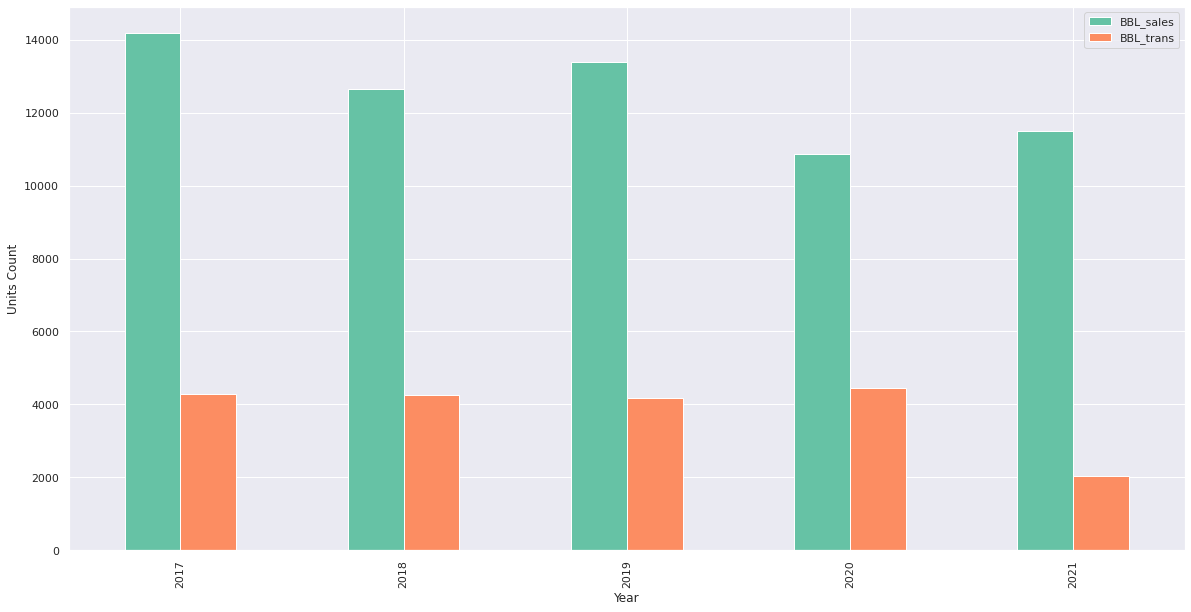

In [168]:
# Sales units and transferred units by year
sns.set_palette('Set2')
y.plot(x='SALE YEAR', y=['BBL_sales', 'BBL_trans'], kind='bar')
plt.xlabel('Year')
plt.ylabel('Units Count')

Text(0, 0.5, 'Units Count')

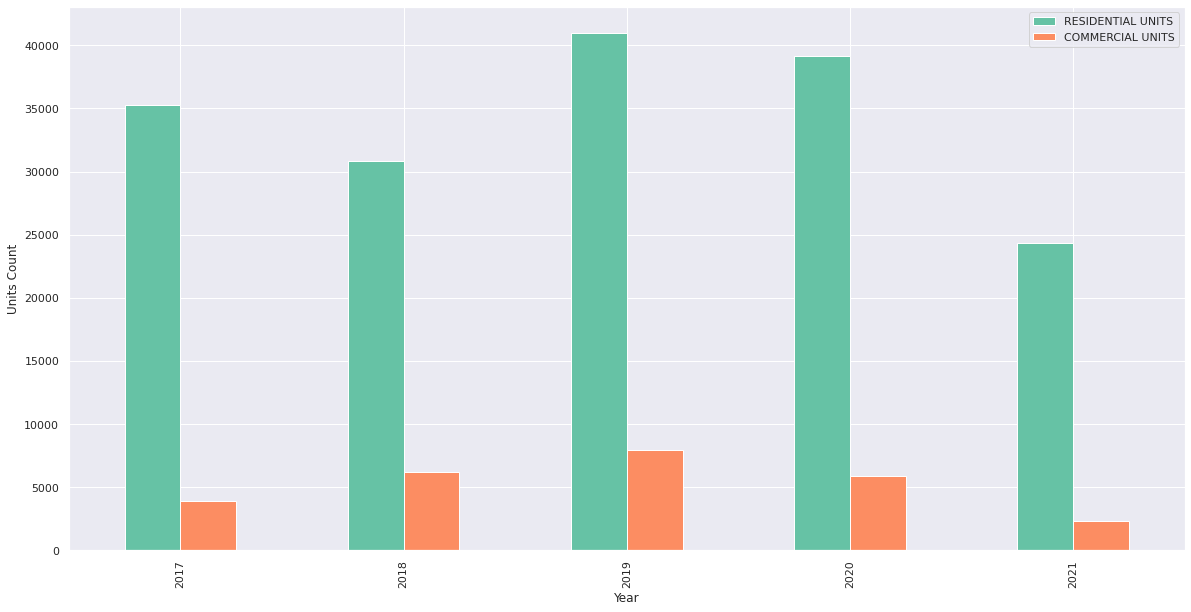

In [169]:
# Residential units and commercial units by year
sns.set_palette('Set2')
house.groupby('SALE YEAR')[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Units Count')

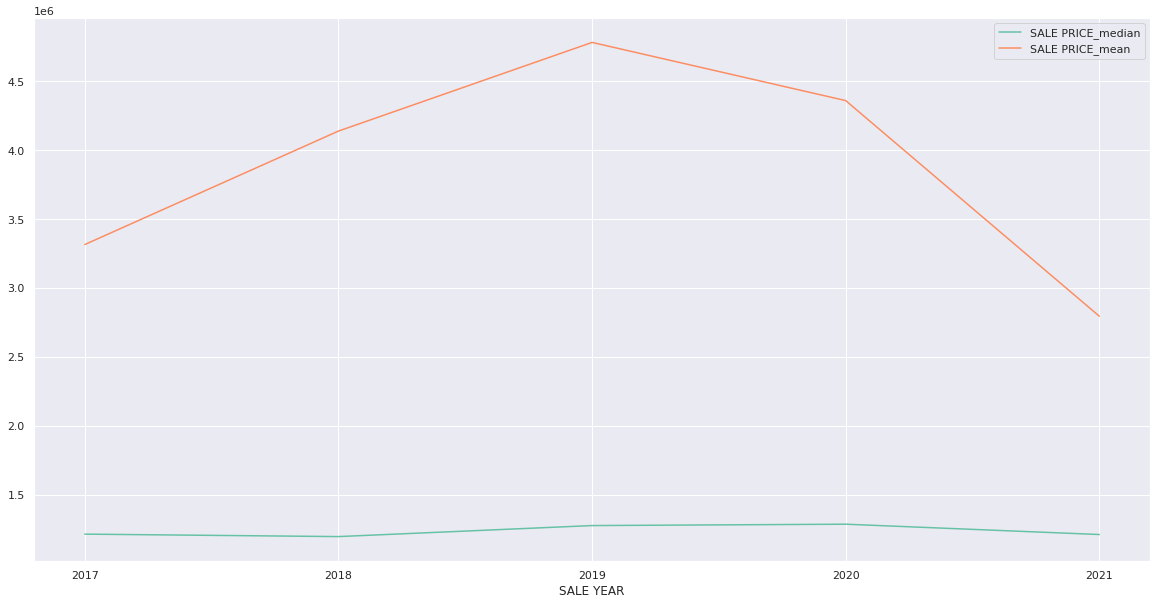

In [170]:
# Median and mean sales price by year
median_sales=sales.groupby('SALE YEAR')['SALE PRICE'].median().reset_index()
mean_sales=sales.groupby('SALE YEAR')['SALE PRICE'].mean().reset_index()
m = median_sales.merge(mean_sales, on='SALE YEAR', suffixes=('_median','_mean'))
m.plot(x='SALE YEAR', y=['SALE PRICE_median', 'SALE PRICE_mean'], kind='line')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

Text(0, 0.5, 'Average Price per SQFT')

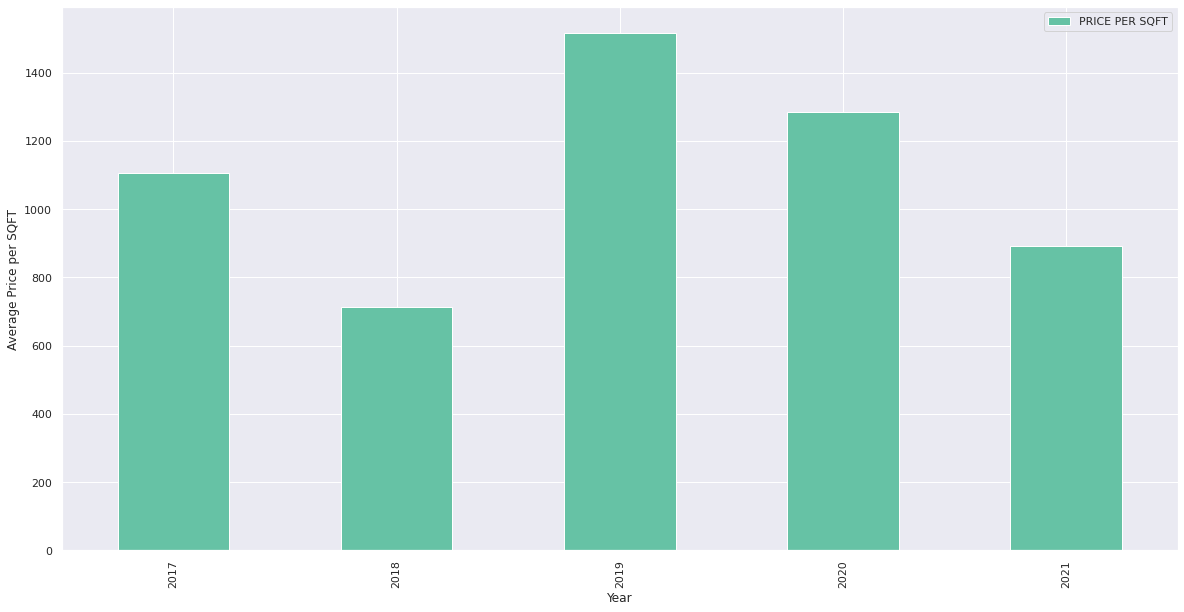

In [171]:
# Calculate the average price per square foot
price = sales.groupby('SALE YEAR')['SALE PRICE'].sum().reset_index()
land = sales.groupby('SALE YEAR')['LAND SQUARE FEET'].sum().reset_index()
avg = price.merge(land, on='SALE YEAR')
avg['PRICE PER SQFT'] = avg['SALE PRICE']/avg['LAND SQUARE FEET']
avg.plot(x='SALE YEAR', y='PRICE PER SQFT', kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Price per SQFT')

Text(0, 0.5, 'Total Units Count')

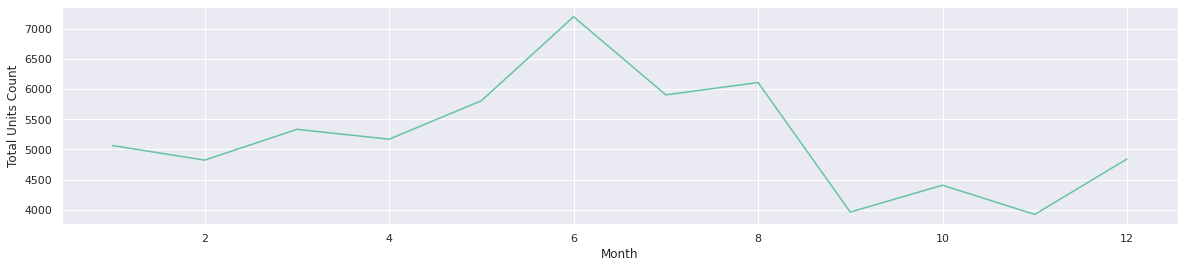

In [172]:
# Total units count by each month
a=sales.groupby('SALE MONTH')['BBL'].count().plot(kind='line', figsize=(20,4))
plt.xlabel('Month')
plt.ylabel('Total Units Count')

Text(0, 0.5, 'Total Units Count')

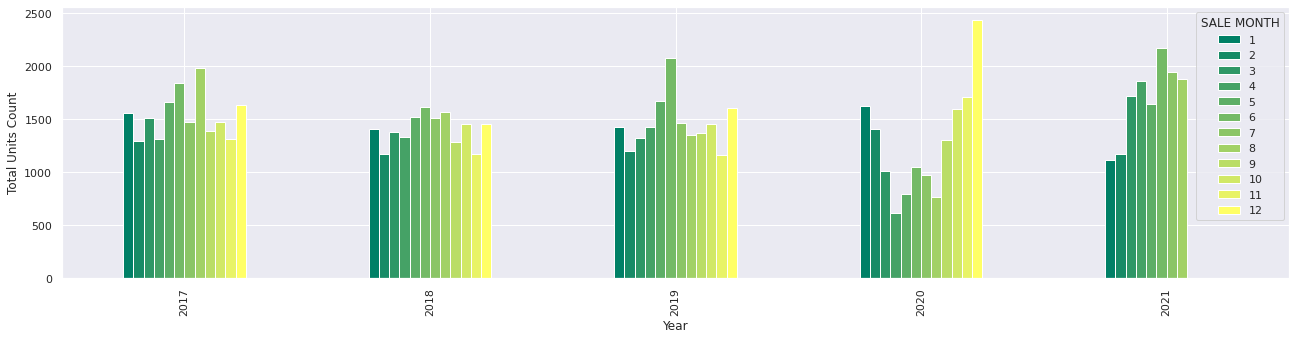

In [173]:
# Total units count by each month in the recent 5 years
house.groupby('SALE YEAR')['SALE MONTH'].value_counts().unstack().plot(kind='bar', figsize=(22,5), cmap='summer')
plt.xlabel('Year')
plt.ylabel('Total Units Count')

In [175]:
neighborhood_y = house.groupby(['NEIGHBORHOOD', 'SALE YEAR'])['BBL'].count().sort_values(ascending=False).reset_index()

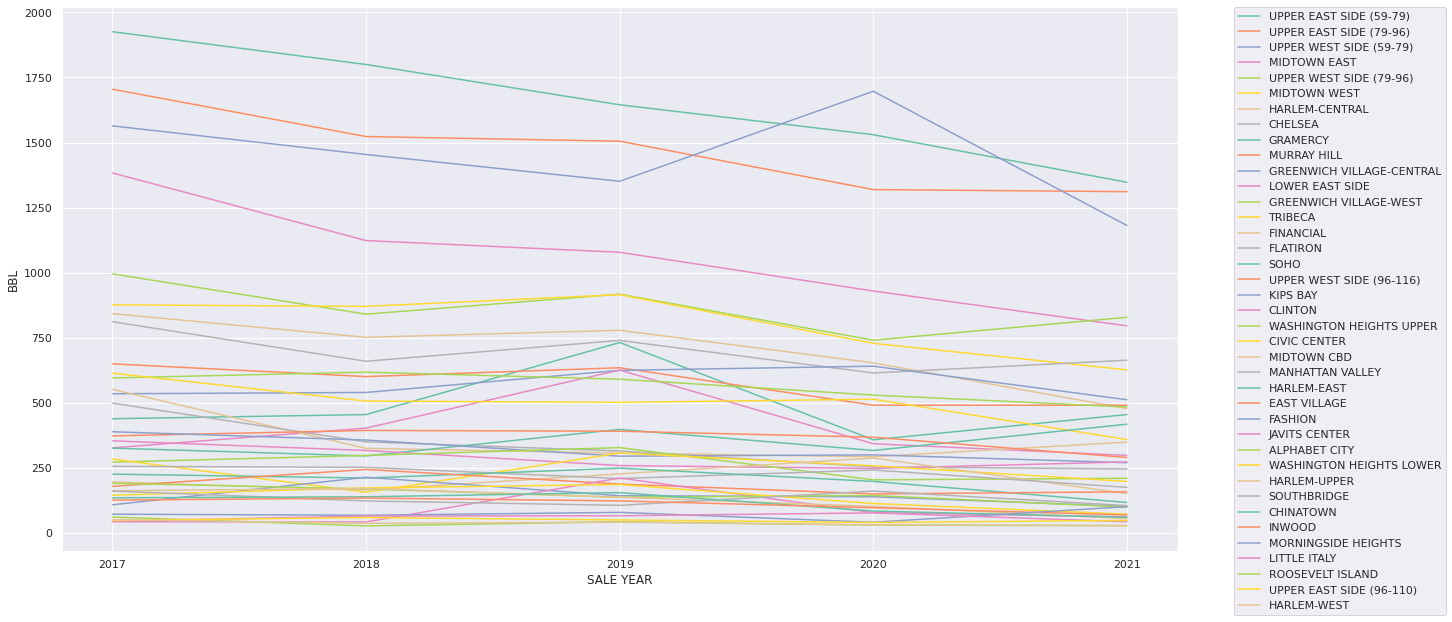

In [176]:
# Total units count in each neighborhood trends by year
sns.lineplot(data=neighborhood_y, x='SALE YEAR', y='BBL', hue='NEIGHBORHOOD', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

**Insights**

Generally, the house market is the most popular in summer (May-August). In contrast, in the year 2020, the house market is the most popular in winter (October-December), and the least popular in summer. Probably because of the pandemic. People stayed at home from spring to summer and when the country reopened in fall, the demand for houses surged.

The popularity of the Upper East Side, Upper West Side, and Midtown East have declined in recent years.

There is a huge difference between the mean sales prices and the median sales prices by year. It could be due to the outliners (extremely high house prices).
The average price per square foot is the lowest in 2018. 

### Building Types of Manhattan

*   Majority of properties sold are residential units 
*   There is a bigger range in price in commercial properties than residential properties 
*   Most popular building types have building codes R (residential condos in small buildings), D (apartments with elevator in building ), and C (multiple family homes)
*   Trend of increasing size of properties (measure by land square feet) by the year they are built  






In [177]:
#create table called 'building' that just contains select columns 
building = pd.read_csv('/content/drive/MyDrive/Team Project/house.csv')
building.drop(axis=1,columns=['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'LOT', 'BUILDING CLASS CATEGORY', 'BLOCK', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'SALE DATE'], inplace=True)
building = building[['BBL', 'TAX CLASS', 'BUILDING CLASS', 'LAND SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

In [178]:
building.head()

,BBL,TAX CLASS,BUILDING CLASS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
0,137528,2,C4,1750,1900,3750000
1,138536,2,C7,2650,1910,5235000
2,13925,2,C2,2139,1900,0
3,13926,2,C2,1633,1900,6625000
4,140061,2,C7,2388,1900,7675000


In [179]:
#number of properties sold in each tax class 
#tax class 1 & 2 = residential, tax class 3 & 4 = commercial 
building.groupby('TAX CLASS')['BBL'].count()

TAX CLASS
1     1653
2    75002
4     5124
Name: BBL, dtype: int64

In [181]:
#count of residential and non-residential/commerical properties 
residential_building = house[(house['TAX CLASS'] == 1)|(house['TAX CLASS'] == 2)]['BBL'].count()
commercial_building = house[(house['TAX CLASS'] == 4)]['BBL'].count()
print('Residential Count:', residential_building)
print('Commericla Count:', commercial_building)
print('Percent Residential', residential_building/(residential_building + commercial_building)*100,'%')
print('Percent Commercial', commercial_building/(residential_building + commercial_building)*100,'%')

Residential Count: 76655
Commericla Count: 5124
Percent Residential 93.73433277491776 %
Percent Commercial 6.265667225082233 %


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


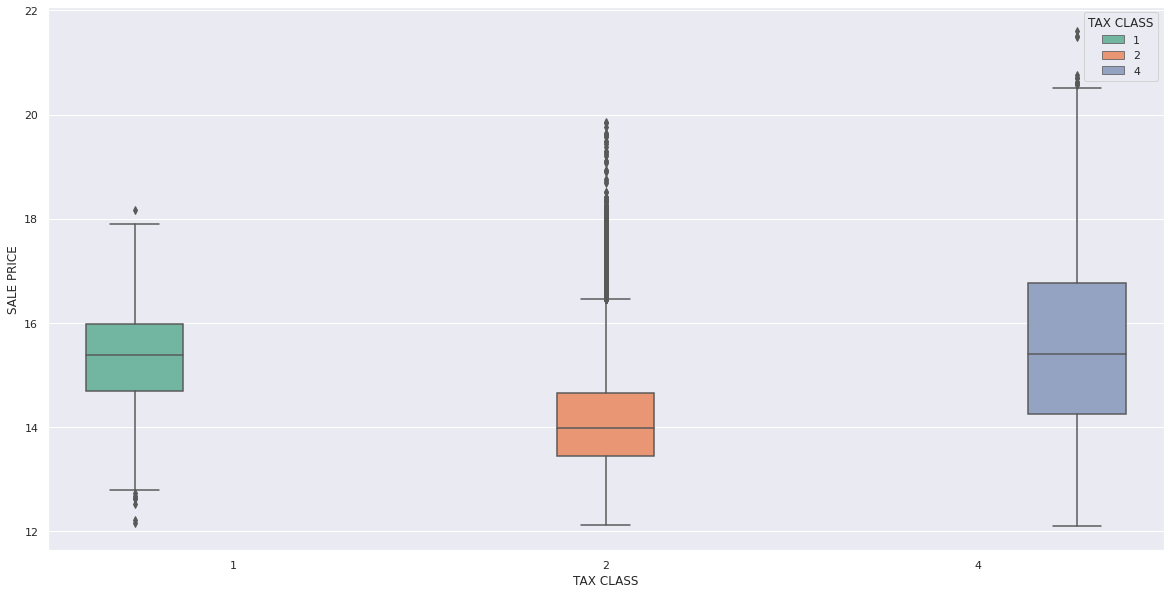

In [182]:
#plot of sale price by tax class of building
sns.boxplot(x='TAX CLASS', y = np.log(house['SALE PRICE']), data = house[(house['SALE PRICE'] > 180000)], hue = 'TAX CLASS', order=[1,2,4])

In [184]:
#simplify building code 
#number of properties in each building type sold 
building_code_add = building
building_code_add['BUILDING TYPE'] = building_code_add['BUILDING CLASS'].astype(str).str[0]
building_code_add = building_code_add[(building_code_add['BUILDING TYPE'] != '0')]
building_code = building_code_add.groupby('BUILDING TYPE')['BBL'].count()
building_type = building_code.to_frame(name = 'Count').reset_index().drop(index = 0)
building_type.head()

,BUILDING TYPE,Count
1,B,481
2,C,6554
3,D,27814
4,E,27
5,F,11


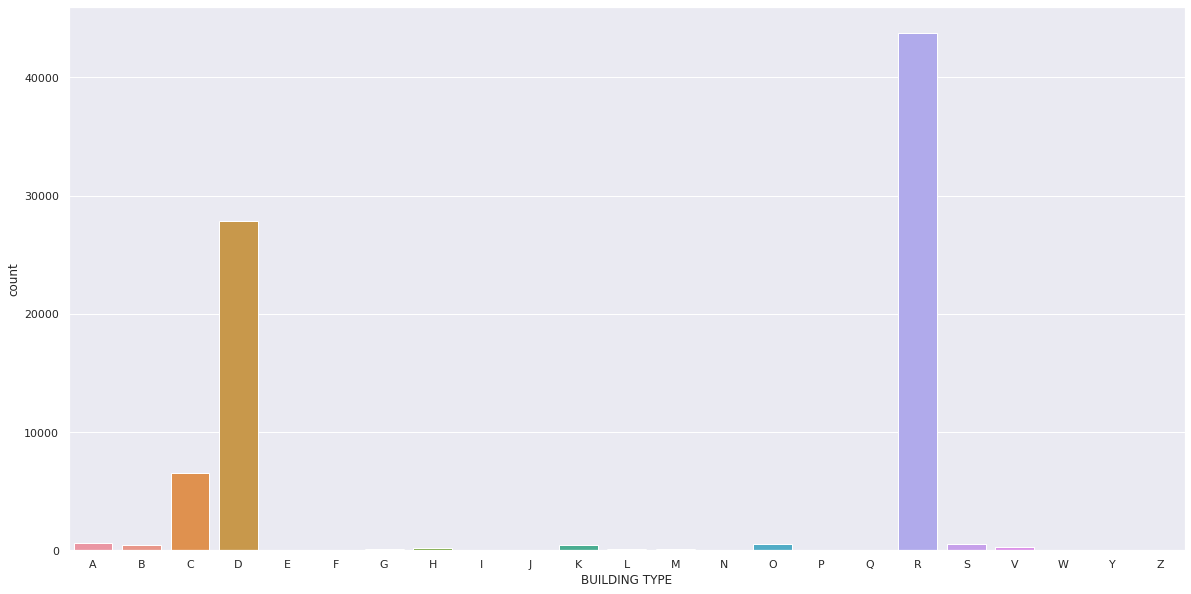

In [185]:
#plot count of building class
sns.countplot(x= 'BUILDING TYPE', data = building_code_add, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S','V', 'W', 'Y', 'Z'])

In [186]:
#identify most popular building type 
building_type.sort_values('Count',ascending = False).head(5)

,BUILDING TYPE,Count
17,R,43792
3,D,27814
2,C,6554
14,O,553
18,S,513


In [187]:
#identify least popular building type
building_type.sort_values('Count',ascending = True).head(5)

,BUILDING TYPE,Count
21,Y,3
5,F,11
16,Q,15
9,J,19
13,N,20


In [188]:
#identify most popular building code
most_building_code = building.groupby(['BUILDING CLASS'])['BBL'].count().reset_index().sort_values('BBL', ascending = False)
print(most_building_code.head(10))

    BUILDING CLASS    BBL
115             R4  34235
24              D4  26103
120             R9   4139
16              C6   3495
112             R1   1339
20              D0    992
128             RS    932
122             RB    828
17              C7    805
14              C4    559


In [189]:
#identify least popular building 
least_building_code = building.groupby(['BUILDING CLASS'])['BBL'].count().reset_index().sort_values('BBL', ascending = True)
print(least_building_code.head(20))

    BUILDING CLASS  BBL
103             P3    1
60              HH    1
54              H5    1
53              H4    1
69              J3    1
48              GU    1
46              G8    1
43              G5    1
71              J5    1
35              F2    1
34              F1    1
73              J8    1
109             Q2    1
111             R0    1
118             R7    1
79              K5    1
31              E2    1
1               A3    1
149             Y7    1
63              I1    2


In [190]:
#average size of properties built trend by decade
decade_add = building
decade_add['DECADE'] = (building['YEAR BUILT'].astype(int)//10)*10
year_built_filter = decade_add[decade_add['DECADE'] >= 1700]
year_built = year_built_filter.groupby('DECADE')['LAND SQUARE FEET'].mean().astype(int).to_frame(name= 'LAND SQUARE FEET AVG').reset_index()
print(year_built)

    DECADE  LAND SQUARE FEET AVG
0     1790                  2558
1     1800                  1738
2     1820                  1479
3     1830                  1325
4     1840                  2945
5     1850                  2612
6     1860                  2858
7     1870                  2952
8     1880                  3028
9     1890                  2474
10    1900                  3352
11    1910                  3185
12    1920                  3410
13    1930                  3619
14    1940                  5752
15    1950                  3548
16    1960                  3902
17    1970                  4333
18    1980                  4163
19    1990                  4454
20    2000                  3580
21    2010                  5240
22    2020                  3088


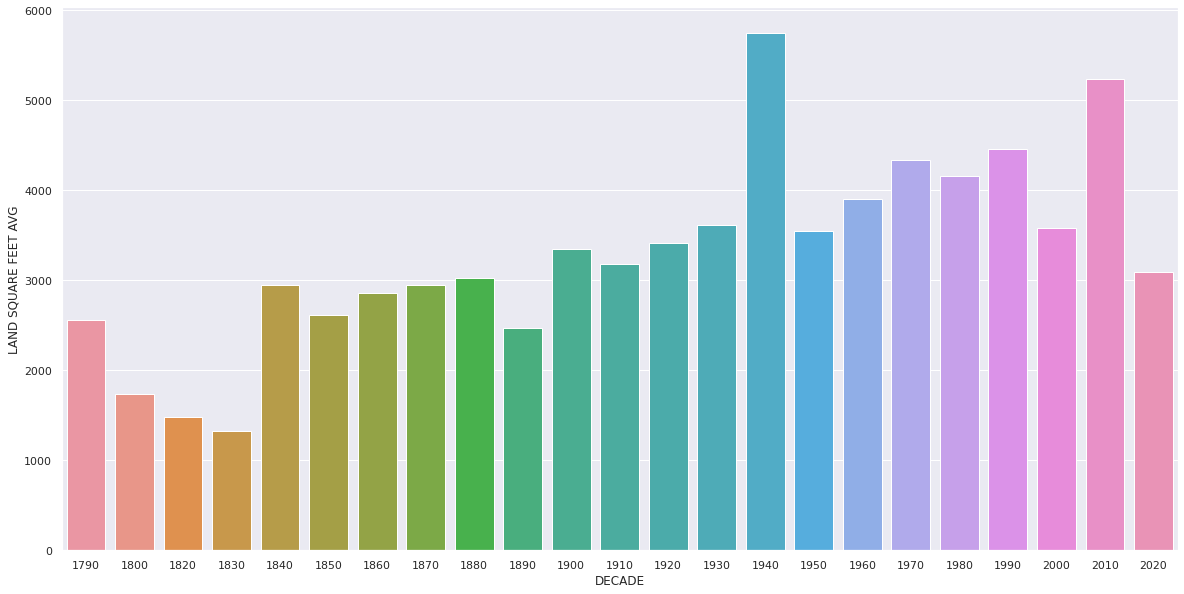

In [193]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x = 'DECADE', y = 'LAND SQUARE FEET AVG', data = year_built)

In [192]:
sns.set(rc = {'figure.figsize':(10,8)})

**Insights**

There are more residential properties in Manhattan being sold than commercial with 93% of sales in the last five years being residential properties. The majority of these properties fall into tax class 2 which are usually condos or apartments and are generally less expensive with commerical buildings having the largest range in prices and a higher median price. 

Some of the most popular building types in Manhattan belong to the "R" building class category followed by "D" and "C" which are all residential, apartment variations which support our other findings. 

The size of properties are growing larger as they are built closer to present- the trend of average land square feet of properties to the decade that they were built in is generally increasing. 




### Neighborhoods of Manhanttan 
*   Most commerical neighborhoods are Chinatown and Fashion District. 
*   Most expensive neighborhoods by price/square foot are Financial and Javitz Center neighborhoods.
*   Most popular locations to buy property are in the Upper East Side area.





In [194]:
Neighborhood = pd.read_csv('/content/drive/MyDrive/Team Project/house_zero.csv')
Neighborhood.drop(axis=1,columns=['Unnamed: 0', 'BOROUGH', 'LOT', 'BUILDING CLASS CATEGORY', 'BLOCK', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET', 'BUILDING CLASS'], inplace=True)
Neighborhood = Neighborhood[['BBL', 'TAX CLASS','NEIGHBORHOOD','SALE DATE', 'LAND SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]

In [195]:
Neighborhood['Commercial/Residential']=0
for i in range(len(Neighborhood)):
  if ((Neighborhood['TAX CLASS'][i] == 1) | (Neighborhood['TAX CLASS'][i] == 2)):
    Neighborhood['Commercial/Residential'] [i] = "Residential"
  else:
    Neighborhood['Commercial/Residential'] [i] = "Commercial"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [196]:
Neighborhood.head()

,BBL,TAX CLASS,NEIGHBORHOOD,SALE DATE,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,Commercial/Residential
0,137528,2,ALPHABET CITY,2017-04-03,1750,1900,3750000,Residential
1,138536,2,ALPHABET CITY,2017-07-11,2650,1910,5235000,Residential
2,13925,2,ALPHABET CITY,2017-06-16,2139,1900,0,Residential
3,13926,2,ALPHABET CITY,2017-07-19,1633,1900,6625000,Residential
4,140061,2,ALPHABET CITY,2017-11-13,2388,1900,7675000,Residential


In [197]:
#Distribution of neighborhood properties in the past 5 years
Neighborhood.groupby("NEIGHBORHOOD")["BBL"].count()

NEIGHBORHOOD
ALPHABET CITY                 735
CHELSEA                      3486
CHINATOWN                     568
CIVIC CENTER                 1198
CLINTON                      1446
EAST VILLAGE                  914
FASHION                       701
FINANCIAL                    1821
FLATIRON                     1659
GRAMERCY                     2434
GREENWICH VILLAGE-CENTRAL    2848
GREENWICH VILLAGE-WEST       2814
HARLEM-CENTRAL               3501
HARLEM-EAST                   996
HARLEM-UPPER                  622
HARLEM-WEST                   183
INWOOD                        544
JAVITS CENTER                 431
KIPS BAY                     1606
LITTLE ITALY                  291
LOWER EAST SIDE              1992
MANHATTAN VALLEY             1129
MIDTOWN CBD                  1022
MIDTOWN EAST                 5308
MIDTOWN WEST                 4015
MORNINGSIDE HEIGHTS           356
MURRAY HILL                  2863
ROOSEVELT ISLAND              184
SOHO                         1750
S

In [198]:
#Distribution of commercial or residential properties in neighborhoods over the past 5 years
Neighborhood.pivot_table(values='BBL', index='NEIGHBORHOOD', columns='Commercial/Residential', aggfunc='count')

Commercial/Residential,Commercial,Residential
NEIGHBORHOOD,,
ALPHABET CITY,29.0,706.0
CHELSEA,196.0,3290.0
CHINATOWN,199.0,369.0
CIVIC CENTER,117.0,1081.0
CLINTON,102.0,1344.0
EAST VILLAGE,37.0,877.0
FASHION,304.0,397.0
FINANCIAL,168.0,1653.0
FLATIRON,155.0,1504.0


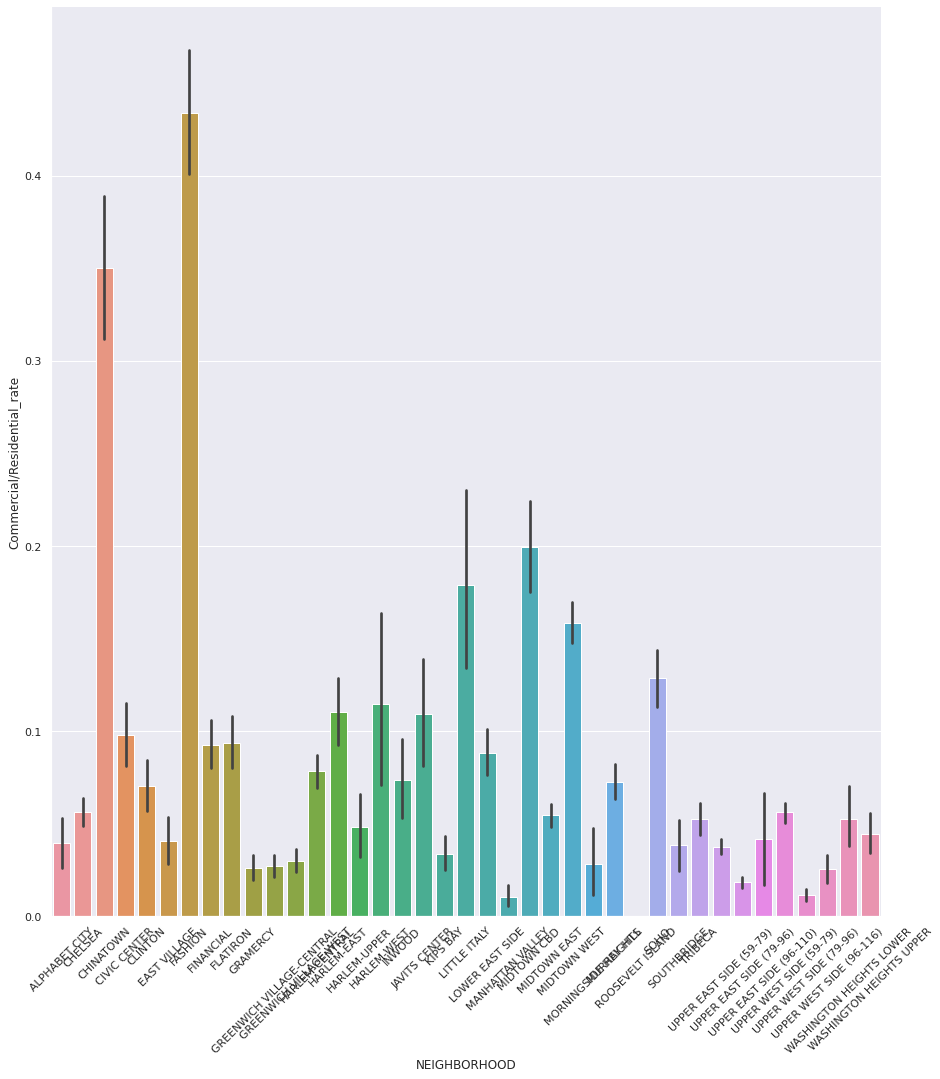

In [199]:
Neighborhood['Commercial/Residential_rate'] = Neighborhood['Commercial/Residential'].replace("Residential", 0).replace("Commercial", 1)
sns.set(rc={'figure.figsize':(110,10)})
sns.catplot(data=Neighborhood, x='NEIGHBORHOOD', y='Commercial/Residential_rate', height=13.5, kind='bar')
plt.xticks(rotation = 45)
plt.show();

In [200]:
Neighborhood['BBL_sales'] = Neighborhood[Neighborhood['SALE PRICE'] >= 180000]["BBL"] 
Neighborhood['BBL_trans'] = Neighborhood[Neighborhood['SALE PRICE'] < 180000]["BBL"]

In [201]:
print(Neighborhood['BBL_sales'].count())
print(Neighborhood['BBL_trans'].count())#Donated and discounted properties

62564
19215


In [202]:
#Distribution of sold commercial or residential properties in neighborhoods over the past 5 years
Neighborhood.pivot_table(values='BBL_sales', index='NEIGHBORHOOD', columns='Commercial/Residential', aggfunc='count')

Commercial/Residential,Commercial,Residential
NEIGHBORHOOD,,
ALPHABET CITY,14.0,489.0
CHELSEA,115.0,2533.0
CHINATOWN,112.0,227.0
CIVIC CENTER,82.0,912.0
CLINTON,46.0,1085.0
EAST VILLAGE,21.0,679.0
FASHION,153.0,307.0
FINANCIAL,96.0,1343.0
FLATIRON,78.0,1218.0


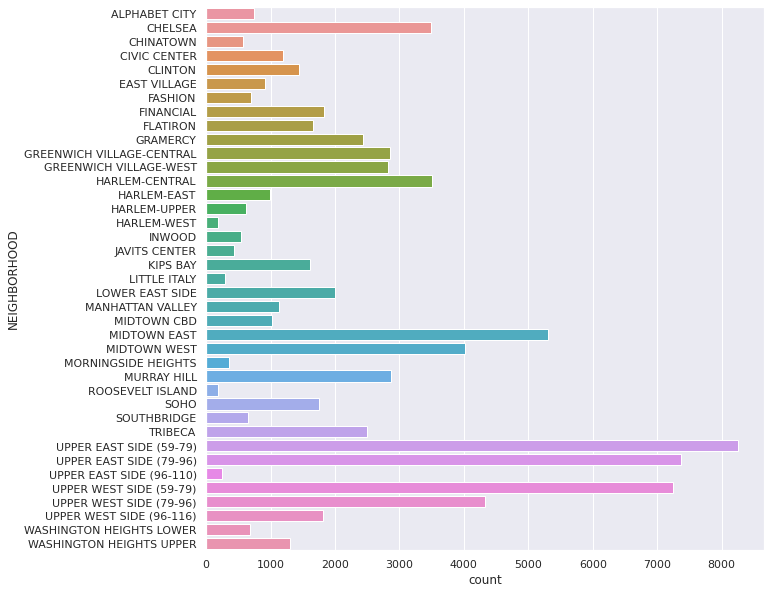

In [203]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y = Neighborhood["NEIGHBORHOOD"], data = Neighborhood['BBL_sales'])
plt.show()

In [204]:
Neighborhood_code = Neighborhood.groupby('NEIGHBORHOOD')['BBL_sales'].count()
Neighborhood_type = Neighborhood_code.to_frame(name = 'Count').reset_index().drop(index = 0)

In [205]:
# Properties on the Upper East Side (59-79) have been the most popular in the last 5 years.
Neighborhood_type.sort_values('Count',ascending = False).head(5)

,NEIGHBORHOOD,Count
31,UPPER EAST SIDE (59-79),6328
32,UPPER EAST SIDE (79-96),5990
34,UPPER WEST SIDE (59-79),5406
23,MIDTOWN EAST,4209
35,UPPER WEST SIDE (79-96),3313


In [206]:
#Properties on the HARLEM-WEST have been the least popular in the last 5 years.
Neighborhood_type.sort_values('Count',ascending = True).head(5)

,NEIGHBORHOOD,Count
15,HARLEM-WEST,119
27,ROOSEVELT ISLAND,142
33,UPPER EAST SIDE (96-110),188
19,LITTLE ITALY,207
25,MORNINGSIDE HEIGHTS,312


In [207]:
price = Neighborhood.groupby('NEIGHBORHOOD')['SALE PRICE'].sum().reset_index()
land = Neighborhood.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].sum().reset_index()
Neighborhood_avg = price.merge(land, on='NEIGHBORHOOD')
Neighborhood_avg['PRICE PER SQFT'] = Neighborhood_avg['SALE PRICE']/Neighborhood_avg['LAND SQUARE FEET']
Neighborhood_avg = Neighborhood_avg[(Neighborhood_avg['SALE PRICE'] != 0)]
Neighborhood_avg = Neighborhood_avg[(Neighborhood_avg['LAND SQUARE FEET'] != 0)]

In [208]:
Neighborhood_avg.head()

,NEIGHBORHOOD,SALE PRICE,LAND SQUARE FEET,PRICE PER SQFT
0,ALPHABET CITY,1033867728,645536,1601.564790
1,CHELSEA,13375179626,2988728,4475.208057
2,CHINATOWN,1019497476,546448,1865.680680
3,CIVIC CENTER,4863766291,1216210,3999.117168
4,CLINTON,6002175421,3732711,1607.993606


In [209]:
Neighborhood_avg.sort_values('PRICE PER SQFT',ascending = False).head(5)

,NEIGHBORHOOD,SALE PRICE,LAND SQUARE FEET,PRICE PER SQFT
7,FINANCIAL,14109344460,927491,15212.378837
17,JAVITS CENTER,4839962324,392305,12337.243532
10,GREENWICH VILLAGE-CENTRAL,12613535715,1146361,11003.109592
30,TRIBECA,9166907994,1447085,6334.740526
22,MIDTOWN CBD,15561962826,2750735,5657.383509


In [210]:
Neighborhood_avg.sort_values('PRICE PER SQFT',ascending = True).head(5)

,NEIGHBORHOOD,SALE PRICE,LAND SQUARE FEET,PRICE PER SQFT
21,MANHATTAN VALLEY,1473208013,5819404,253.154449
18,KIPS BAY,2038667902,5560211,366.652975
16,INWOOD,668537600,1255901,532.317117
9,GRAMERCY,4268381414,6089666,700.922089
37,WASHINGTON HEIGHTS LOWER,964930867,1349643,714.952670


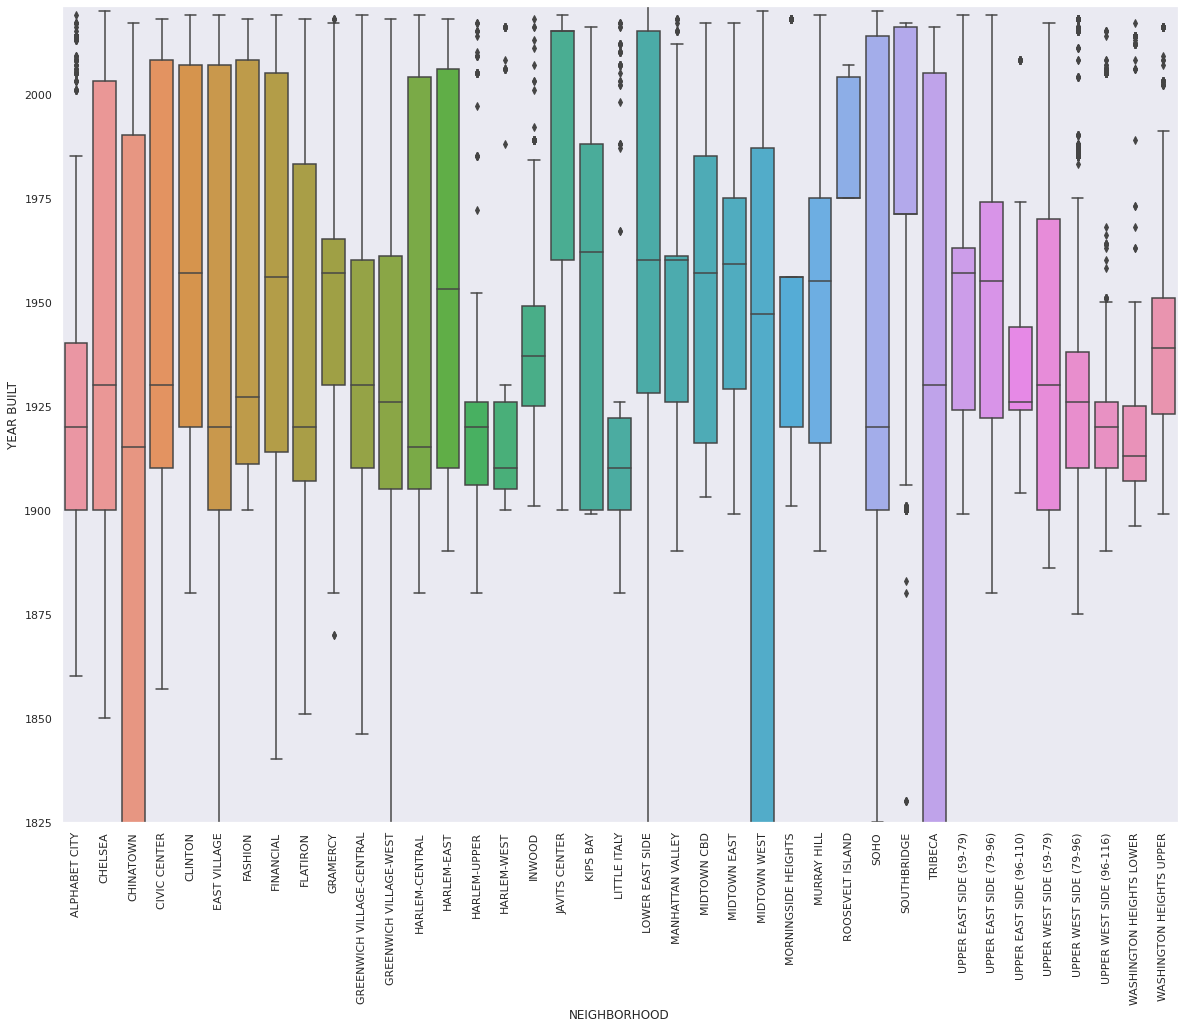

In [252]:
#year built boxplot versus neighborhood 
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x='NEIGHBORHOOD', y="YEAR BUILT", data=house)
fig.axis(ymin=1825, ymax=2021);
plt.xticks(rotation=90);

**Insights**

Majority of neighborhood properties sold are residential units, Chinatown and the Fashion neighborhood have the most commercial properties.

Properties on the Upper East Side(59-79) have been the most popular in the last 5 years, properties on the Harlem-west have been the least popular.

The Financial neighborhood and Javits Center has the highest price per square foot  and the Manhattan valley has the lowest price per square foot.

Most neighborhoods were developed after the 1900s with the majority of the properties being built after 1900. Chinatown, Midtown West, and Tribeca were the only three that were more developed in the 19th-century. 


### Commerical vs. Residential Properties
*   Commerical properties are consistenly more expensive than residential properties on average 
*   Sale count of residential properties declining year over year but commerical property sale numbers consistent 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


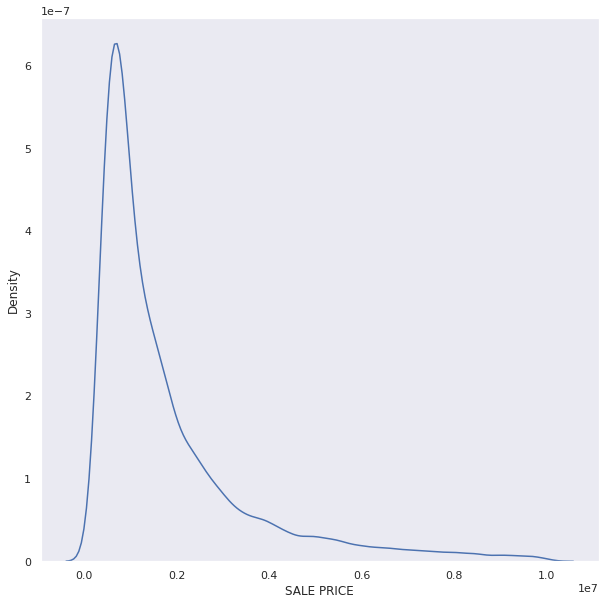

In [259]:
house3=house[house['SALE PRICE']<10000000]
house3=house3[house['SALE PRICE']>180000]#Take it as the threshold to filter out transform.
sns.kdeplot(house3['SALE PRICE'])

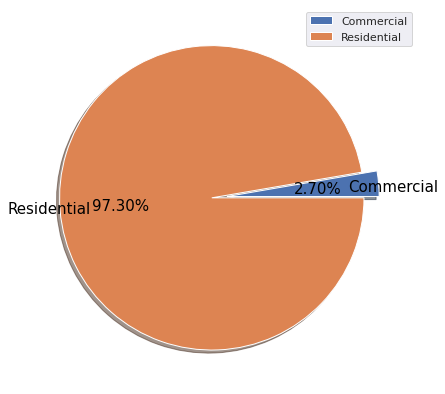

In [260]:
#pie chart of split betweeen commercial properties and residential properties amongst sold units 
data=list(house3.groupby('type of use')['BOROUGH'].count())
fig = plt.figure(figsize =(10, 7))
labels=['Commercial','Residential']
plt.pie(data,labels=labels,explode=[0,0.1], shadow=True,autopct="%0.2f%%",labeldistance=0.8,textprops={'fontsize':15,'color':'black'})
plt.legend()

In [262]:
house3['avg_price']=house3['SALE PRICE']/house3['LAND SQUARE FEET']

In [264]:
house.groupby('YEAR BUILT').size()/house.shape[0]

YEAR BUILT
0       0.124115
1111    0.000037
1798    0.000024
1800    0.000122
1821    0.000012
          ...   
2017    0.014099
2018    0.008303
2019    0.001663
2020    0.001602
2021    0.000024
Length: 164, dtype: float64

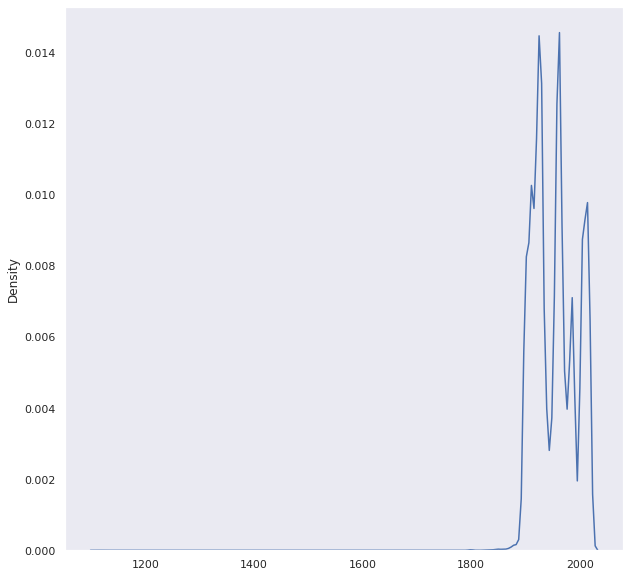

In [265]:
#sns.kdeplot(data=house,x='YEAR BUILT')
house1=house[house['YEAR BUILT']>0]

year_built=list(house1['YEAR BUILT'])

sns.kdeplot(year_built)

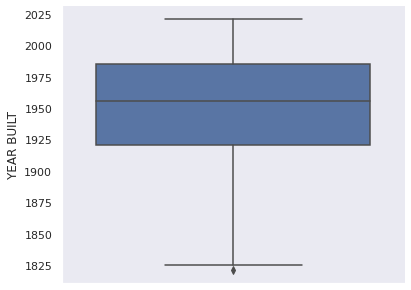

In [266]:
year_of_house=house[house['YEAR BUILT']>1800]
ax = sns.catplot(y="YEAR BUILT", kind="box", data=year_of_house, height=4.2, aspect=1.4)

<BarContainer object of 5 artists>

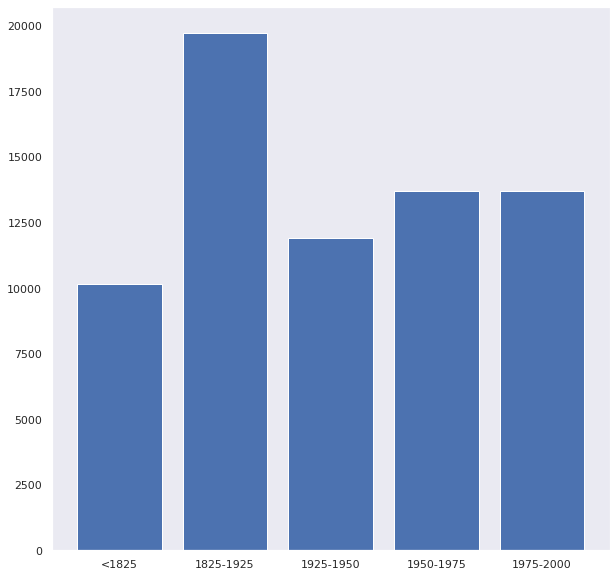

In [267]:
yoc0=house[house['YEAR BUILT']<1825]['YEAR BUILT'].count()
yoc1=house[(house['YEAR BUILT']>1825)&(house['YEAR BUILT']<1925)]['YEAR BUILT'].count()
yoc2=house[(house['YEAR BUILT']>1925)&(house['YEAR BUILT']<1950)]['YEAR BUILT'].count()
yoc3=house[(house['YEAR BUILT']>1950)&(house['YEAR BUILT']<1975)]['YEAR BUILT'].count()
yoc3=house[(house['YEAR BUILT']>1975)&(house['YEAR BUILT']<2000)]['YEAR BUILT'].count()
yoc4=yoc3=house[house['YEAR BUILT']>2000]['YEAR BUILT'].count()
ls_yoc=[yoc0,yoc1,yoc2,yoc3,yoc4]
#ls_yoc
x=['<1825','1825-1925','1925-1950','1950-1975','1975-2000']
plt.bar(x,ls_yoc)

In [268]:
house2=house[house['SALE PRICE']>10000000]
price=house2['SALE PRICE']
len(price)

3073

In [269]:
x1=house['SALE PRICE']
x1=house['SALE PRICE'].sort_values()
p=x1.quantile(q=0.235)
p

180000.0

In [270]:
#group be year
house3['SALE DATE'] = pd.to_datetime(house3['SALE DATE'])
house3['SALE DATE']=house3['SALE DATE'].dt.year
house3.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS,BUILDING CLASS,SALE PRICE,SALE DATE,BBL,SALE YEAR,SALE MONTH,type of use,type of sale,avg_price
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,375,28,738 EAST 6TH STREET,10009,11,0,11,1750,6500,1900,2,C4,3750000,2017,137528,2017,4,R,S,2142.857143
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,385,36,27 AVENUE C,10009,24,1,25,2650,9960,1910,2,C7,5235000,2017,138536,2017,7,R,S,1975.471698
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017,13926,2017,7,R,S,4056.950398
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,400,61,193 EAST 4TH STREET,10009,11,1,12,2388,8045,1900,2,C7,7675000,2017,140061,2017,11,R,S,3213.986600
9,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,373,40,"327 EAST 3 STREET, 1C",10009,0,0,0,2910,2697,1920,2,C6,499000,2017,137340,2017,3,R,S,171.477663


In [271]:
house4=house3
house4['avg_size']=house4['GROSS SQUARE FEET'].mean()

In [272]:
house4=house4[house4['avg_price']<30000]

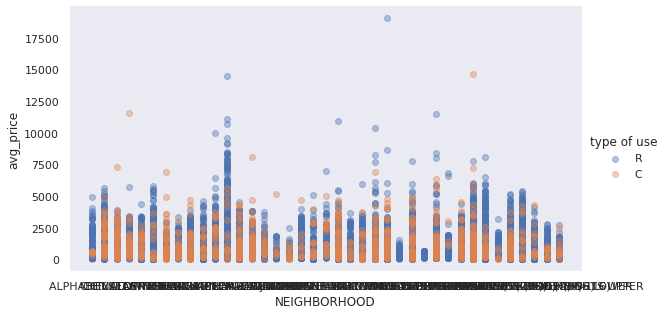

In [273]:
k = sns.PairGrid(house4, y_vars=["avg_price"], x_vars=["NEIGHBORHOOD"], height=4.5,hue='type of use' , aspect=1.8)
ax = k.map(plt.scatter, alpha=0.4)
k.add_legend();

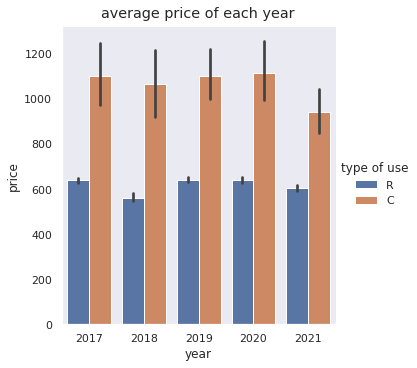

In [274]:
sns.set_style('dark')
# Adjust to add subplots per gender
g = sns.catplot(x="SALE DATE", y="avg_price", 
                data=house3,hue='type of use', kind="bar")

# Add title and axis labels
g.fig.suptitle("average price of each year", y=1.02)
g.set(xlabel="year", 
       ylabel="price")

# Show plot
plt.show()

In [275]:
house6=house
house6['SALE DATE'] = pd.to_datetime(house6['SALE DATE'])
house6['SALE YEAR']=house6['SALE DATE'].dt.year
house6.groupby('SALE YEAR')
print('Median Land Square Feet:', house6['LAND SQUARE FEET'].median())
print('Median Sale Price', house6['SALE PRICE'].median())

Median Land Square Feet: 2910.0
Median Sale Price 850000.0


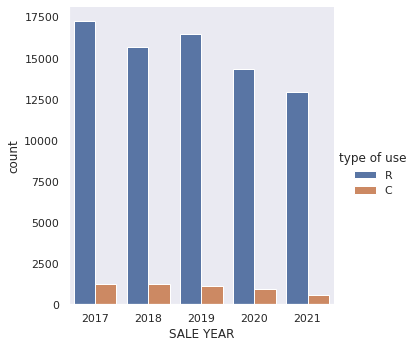

In [276]:
house5=house
house5['SALE DATE'] = pd.to_datetime(house5['SALE DATE'])
house5['SALE YEAR']=house5['SALE DATE'].dt.year
house5
l = sns.catplot(x="SALE YEAR", 
              data=house5, kind="count",hue='type of use')

**Insights**

Usually, houses for commercial use are more expensive than residential houses, whereas only few commercial houses were sold compared to the Residential houses in the last 5 years.

Most of the houses were sold for 200K-400K dollars, but there are actually 4 houses that were sold for even one billion dollar! A crazy price even in Manhattan.


### Sales vs. Transfer of Properties


*   Increase in properties sold to transferred ratio- proportionally more units are being sold versus transferred in ownership
*   More transfers than sales when land square feet < 1000 sq ft and similar above this threshold. 
*   Count of multi-family houses and commercial properties are about the same for sold and transferred and differ for properties in tax class 2 which is majority apartments. 







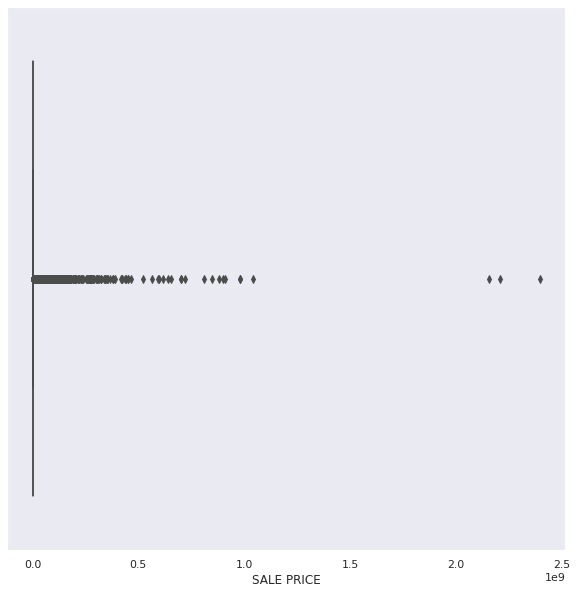

In [278]:
#identify outlier in Sale Price
sns.boxplot(x=house['SALE PRICE'])

In [279]:
# Remove outliers and split to sales and transfer dataset
transfers = house[(house['SALE PRICE'] < 180000)]
sales = house[(house['SALE PRICE'] >= 180000) & (house['SALE PRICE'] < 1500000000)]

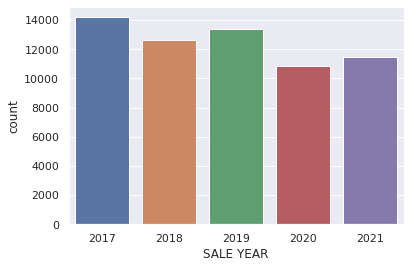

In [280]:
# Sales count based on sale year analysis
sns.set(rc = {'figure.figsize':(6,4)})
sns.countplot(x = 'SALE YEAR',data = sales)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


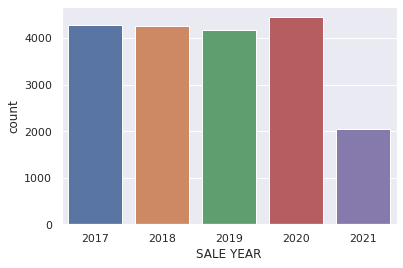

In [281]:
# Transfer count based on sale year analysis
sns.set(rc = {'figure.figsize':(6,4)})
transfers['SALE YEAR'] = pd.DatetimeIndex(transfers['SALE DATE']).year
sns.countplot(x = 'SALE YEAR',data = transfers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


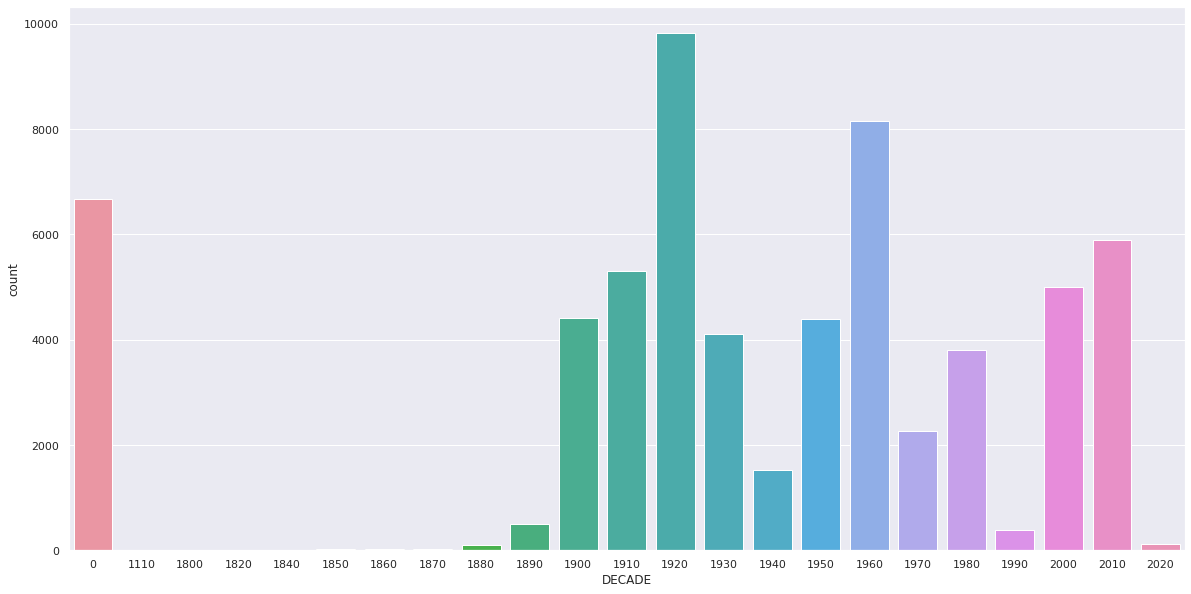

In [282]:
#Sales count based on Year Built analysis
sns.set(rc = {'figure.figsize':(20,10)})
sales['DECADE'] = (sales['YEAR BUILT'].astype(int)//10)*10
sns.countplot(x = 'DECADE',data = sales)


In [283]:
#Create categorial column 
sales['IF_SALE'] = 'YES'
transfers['IF_SALE'] = 'NO'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [284]:
#Merge sales and transfers dataset 
comb = pd.concat([sales, transfers], axis=0)

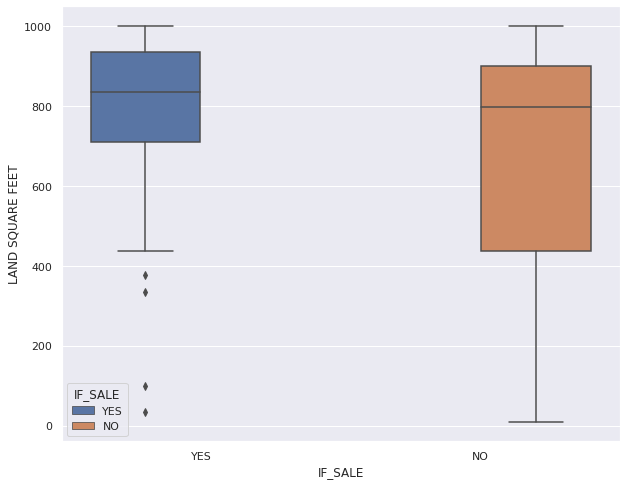

In [285]:
#Average size of property for sales and transfers
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='IF_SALE', y = 'LAND SQUARE FEET', data = comb[(comb['LAND SQUARE FEET'] <= 1000)], hue = 'IF_SALE')

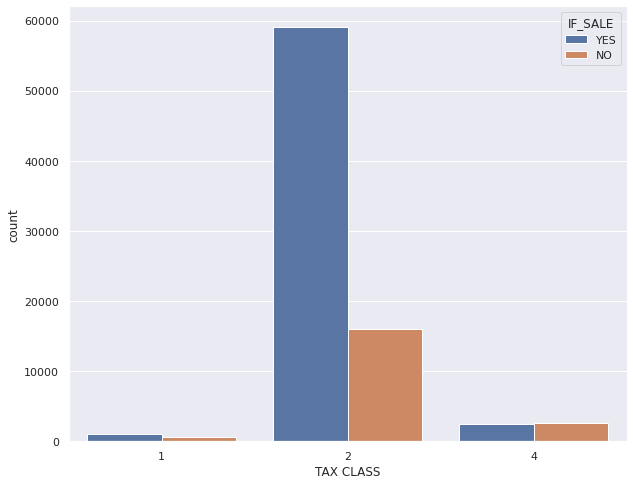

In [286]:
#Count of commercial house and residential house for sales and transfers based on tax class
sns.countplot(data=comb, x='TAX CLASS', hue='IF_SALE', order = [1,2,4])

**Insights**

We identified the sales trend for house sold and house transferred: house sold number went up after covid-19 in 2020 and house transferred number dropped dramatically after 2020. It shows people consider selling their house more after the pandemic

By analyzing the average size of the properties for both sales and transfers, we find that when land square feet are within 1000 range, more transfers happen when land square feet is small. But when land square feet above 1000 range, the distribution for both sales and transfers are similar.

We also count the commercial sales versus residential sales based on different tax classes for sales and transfers. And we find that residential sales more than commercial, while most sales landed on the Tax Class 2. Within residential sales, the count of sales is much more than transfers, but in commercial sales, the count of sales is about the same as count of transfers.


## Conclusion

Our analysis showed evidence of the effect of the Covid-19 pandemic on the real estate market in our year to year trend analysis. The number of properties sold decreased significantly in mid-2020 but has rebounded to even higher counts by 2021 and still increasing. Further time analysis showed that the Manhattan real estate market is most active in the summer and sales dwindle towards the latter months. 

Our neighborhood analysis indicated that Chinatown or Fashion districts have more commercial properties than other neighborhoods to buy or sell while the most popular neighborhood for real estate is in the Upper East Side of Manhattan. However, the most expensive section of Manhattan to live in is the Financial or Javitz Center area which has the greatest price/square foot.

Generally, more residential units are sold than commercial units with apartments and condos being the most popular type of property. Properties built are getting larger with most of Manhattan's pieces of real estate being built later than 1900. Since Covid-19, more properties are being sold in monetary transcations rather in a transfer of ownership. 